# Problem Statement

An education company named X Education sells online courses to industry professionals. 
On any given day, many professionals who are interested in the courses land on their website and browse for courses.
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets Lead_data through past referrals. Once these Lead_data are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the Lead_data get converted while most do not. The typical lead conversion rate at X education is around 30%.
There are a lot of Lead_data generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential Lead_data well (i.e. educating the Lead_data about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising Lead_data, i.e. the Lead_data that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the Lead_data such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of the Case Study
To build a logistic regression model to assign lead score between 0 to 100 to each of the Lead_data which can be used by the company to target potential Lead_data. A higher score would mean that the lead is hot, i.e, is most likely to convert whereas a lower score would mean that the lead is cold and will not get converted.

# To Read and Understand the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
Lead_data = pd.read_csv('Leads.csv')
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Quality Checks

In [3]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
Lead_data.shape

(9240, 37)

In [5]:
sum(Lead_data.duplicated(subset='Prospect ID'))

0

Inference - Shows no duplicates

Data Cleaning

In [6]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Converting 'Select' values to NaN.
Lead_data = Lead_data.replace('Select', np.nan)

In [8]:
### Null Check
round((100*Lead_data.isnull().sum()/Lead_data.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
## Finding columns which are having more than 40% null values
dropcol=Lead_data.loc[:,list(round((100*Lead_data.isnull().sum()/Lead_data.shape[0]),2)>40)].columns
dropcol

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [10]:
## Dropping columns that have more than 40% null values
Lead_data=Lead_data.drop(dropcol,axis=1)

In [11]:
#checking null values percentage
round((100*Lead_data.isnull().sum()/Lead_data.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

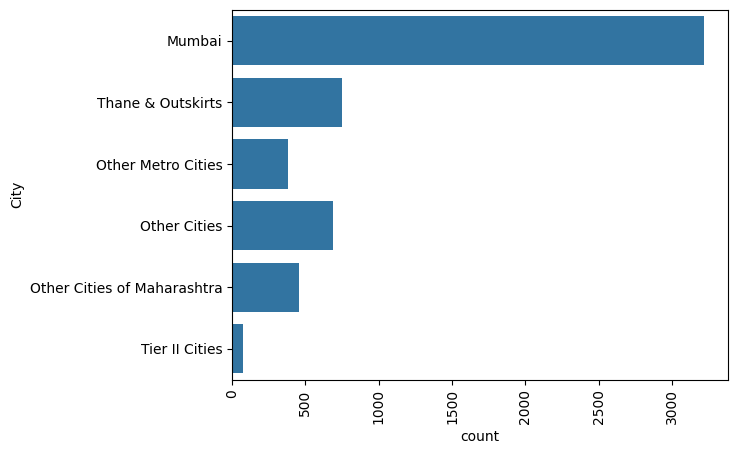

In [12]:
## Checking City
sns.countplot(Lead_data.City)
plt.xticks(rotation = 90)
plt.show()

In [13]:
# Imputing Null with 'Others'
Lead_data['City'] = Lead_data['City'].replace(np.nan, 'Others')

# Merging Cities which are low in numbers to 'Others'
Lead_data['City'] = Lead_data['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [14]:
Lead_data['City'].value_counts()

City
Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: count, dtype: int64

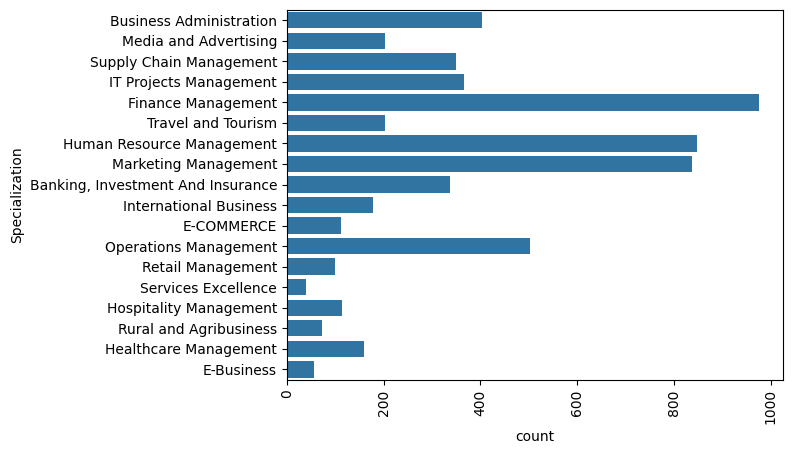

In [15]:
## Checking Specialization
sns.countplot(Lead_data.Specialization)
plt.xticks(rotation = 90)
plt.show()

In [16]:
Lead_data.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [17]:
# Imputing Null with 'Others'
Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan, 'Others')

# Merging Specialization which are low in numbers to 'Others'
Lead_data['Specialization'] = Lead_data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [18]:
Lead_data.Specialization.value_counts()

Specialization
Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: count, dtype: int64

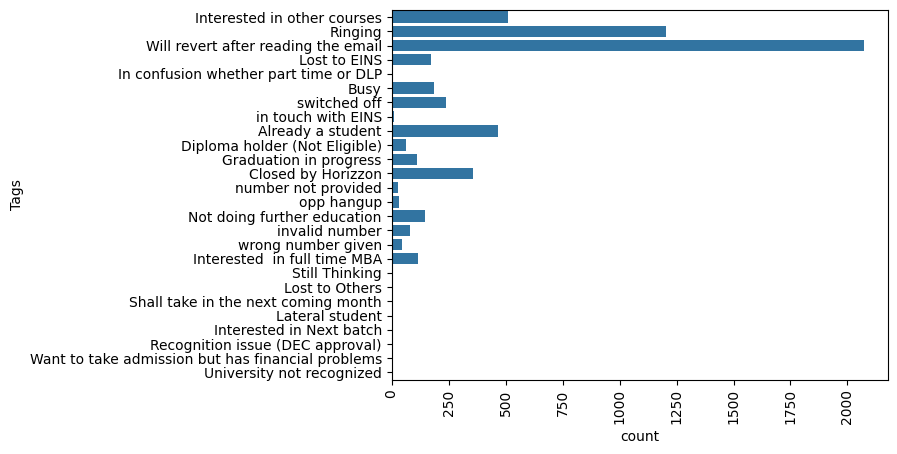

In [19]:
## Checking Tags
sns.countplot(Lead_data.Tags)
plt.xticks(rotation = 90)
plt.show()

In [20]:
Lead_data.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [21]:
# Imputing Null with Others
Lead_data['Tags'] = Lead_data['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others (each category should have minimum 5% of total data)
Lead_data['Tags'] = Lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

Lead_data.Tags.value_counts()

Tags
Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: count, dtype: int64

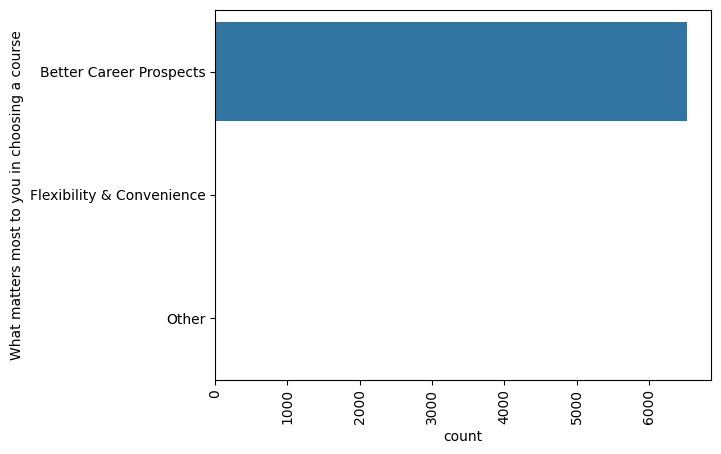

In [22]:
## Checking What matters most to you in choosing a course
sns.countplot(Lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation = 90)
plt.show()

In [23]:
Lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [24]:
## drop 'What matters most to you in choosing a course' as it is highly skewed
Lead_data=Lead_data.drop('What matters most to you in choosing a course',axis=1)

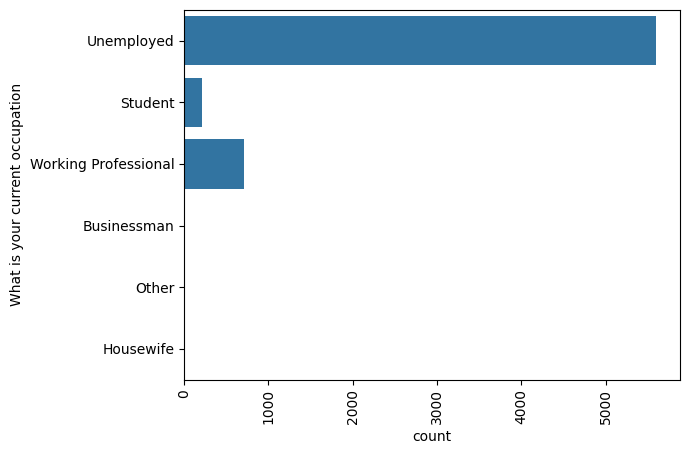

In [25]:
## Checking What is your current occupation
sns.countplot(Lead_data['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [26]:
Lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [27]:
# Imputing Null with Others
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(np.nan, 'Other')

In [28]:
Lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

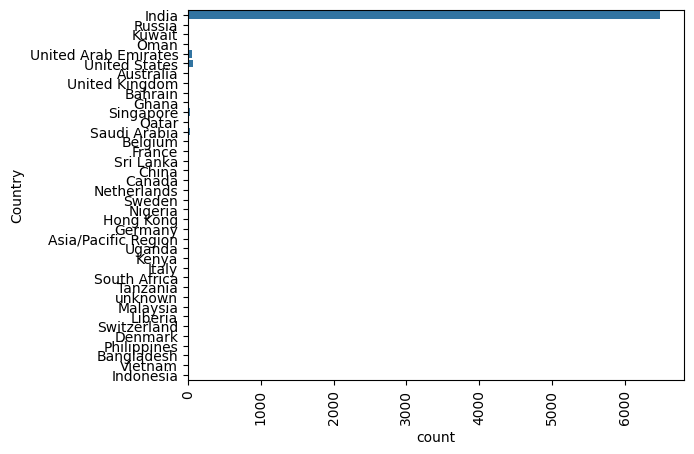

In [29]:
## Checking Country
sns.countplot(Lead_data['Country'])
plt.xticks(rotation = 90)
plt.show()

In [30]:
Lead_data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [31]:
## drop 'Country' as it is highly skewed
Lead_data=Lead_data.drop('Country',axis=1)

In [32]:
## Checking Last Activity
Lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [33]:
# Imputing Null with Others
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(np.nan, 'Others')

# Merging low frequency items to Others
Lead_data['Last Activity'] = Lead_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [34]:
## Checking Last Activity
Lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [35]:
# Checking unique value counts of Lead Source 

Lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [36]:
# Merging 2 Google into one category
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace('google', 'Google')


# Imputing Null with Others
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(np.nan, 'Others')

# Merging low frequency items to Others
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [37]:
# Checking unique value counts 
Lead_data['Lead Source'].value_counts()

Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: count, dtype: int64

In [38]:
## Checking Last Notable Activity
Lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [39]:
# Merging low frequency items to Others
Lead_data['Last Notable Activity'] = Lead_data['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable', 
                                                                         'Had a Phone Conversation', 'Email Marked Spam', 
                                                                         'Resubscribed to emails', 'Approached upfront', 
                                                                         'Email Received', 'Form Submitted on Website', 
                                                                         'View in browser link Clicked'], 'Others')

In [40]:
# Checking TotalVisits
Lead_data.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [41]:
# Impute TotalVisits with the median
TotalVisits_med = Lead_data.TotalVisits.median()
Lead_data.TotalVisits.fillna(TotalVisits_med, inplace=True)

In [42]:
# Checking Page Views Per Visit
Lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [43]:
# Impute Page Views Per Visit with the median
pvpv_med = Lead_data['Page Views Per Visit'].median()
Lead_data['Page Views Per Visit'].fillna(pvpv_med, inplace=True)

In [44]:
round((100*Lead_data.isnull().sum()/Lead_data.shape[0]),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Tags                                        0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website             

In [45]:
Lead_data_cat = Lead_data.loc[:, Lead_data.dtypes == 'object']
for i in Lead_data_cat:
    print(Lead_data[i].astype('category').value_counts())
    print('###################################################')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
###################################################
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
###################################################
Lead Source
Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       1

The columns below can be dropped  because of high skewness
Do Not Call,Do Not Email,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations
The columns below can be dropped because they have unique values
Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque

In [46]:
dropcol_cols = ['Do Not Call', 'Do Not Email', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                'Through Recommendations', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                'Get updates on DM Content', 'I agree to pay the amount through cheque']
Lead_data.drop(dropcol_cols, axis=1, inplace=True)

In [47]:
Lead_data.shape

(9240, 15)

In [48]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [49]:
## Creating a copy of the dataset excluding unique identifiers:
Lead_data_excl = Lead_data.drop(['Prospect ID', 'Lead Number'], axis=1)

Data Visualization
Uni-variate/BI-Variate Analysis

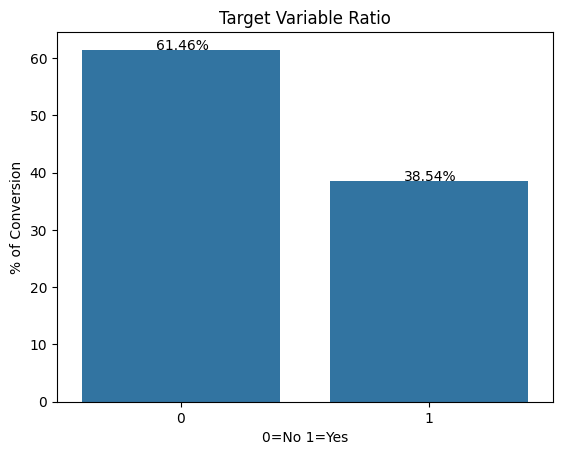

In [50]:
## Percentage of Convered data
ax=sns.barplot(x='Converted', y='Converted', data=Lead_data_excl, estimator=lambda x: len(x) / len(Lead_data_excl) * 100)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

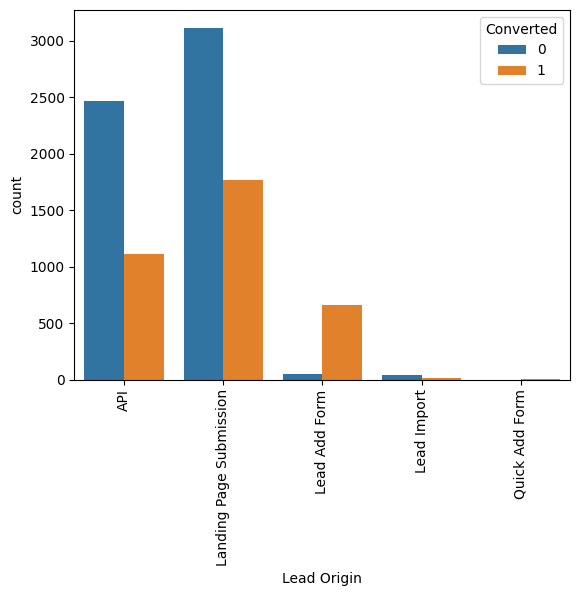

In [51]:
## Lead Origin 
sns.countplot(x = "Lead Origin", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()


Inference:

API and Landing Page Submission have around 35-40% conversion rate but count originated is of a considerable amount.
Lead Add Form has more than 90% conversion rate but count is not very high.
Lead Import and Quick Add From are very less in count.

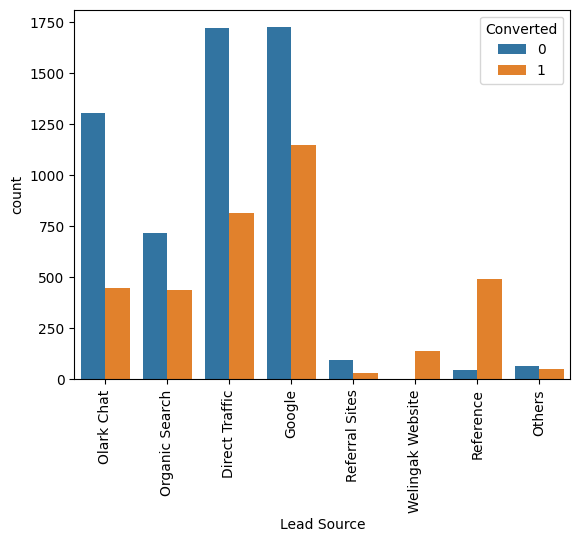

In [52]:
## Lead Source
sns.countplot(x = "Lead Source", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

Inference:

Direct Traffic and Google are generating high number of Lead_data; should be focused for their conversion
Welingak and Reference are having more conversion rate hence should be focused to generate more Lead_data
Lead_data from Olark Chat and Organic Search should be focused for conversion

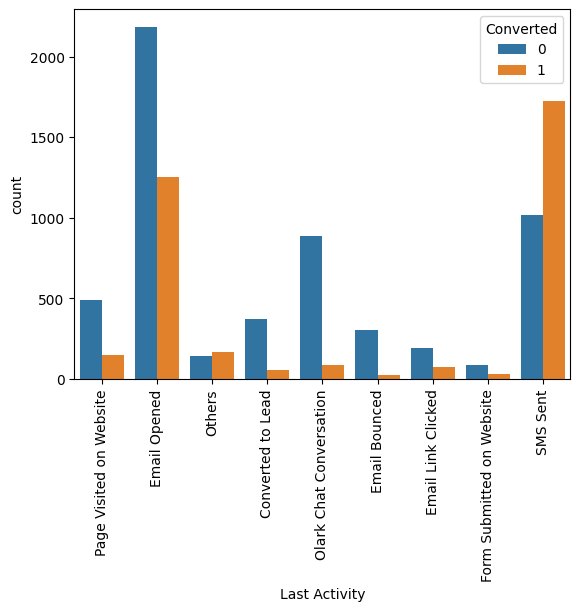

In [53]:
## Last Activity
sns.countplot(x = "Last Activity", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

Inference:

Most of the Lead_data have Email Opened and SMS Sent. More focus should be on Lead_data opening email. And conersion rate for SMS sent is very high and hence they should be targeted for lead conversion

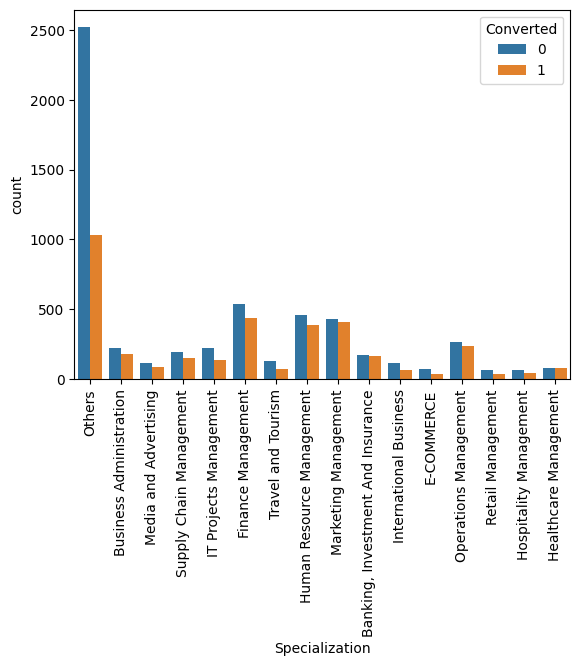

In [54]:
## Specialization
sns.countplot(x = "Specialization", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

Inference:

The focus should be on those various specializations with less Lead_data but high conversion rate.Most of the Lead_data are from 'Others' specialization but the conversion rate is poor

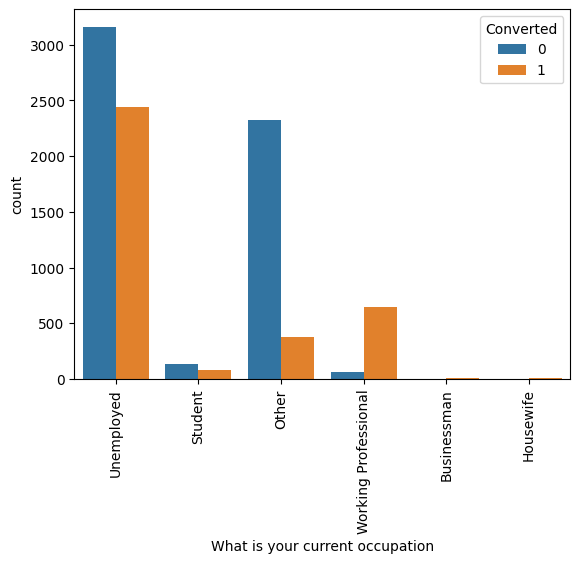

In [55]:
## What is your current occupation
sns.countplot(x = "What is your current occupation", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

Inference:

Working prefessionals have high conversion and the focus should be on them for more Lead_data. Most of the Lead_data are from Unemployed section, foucs should be increasing conversion to get Lead_data.

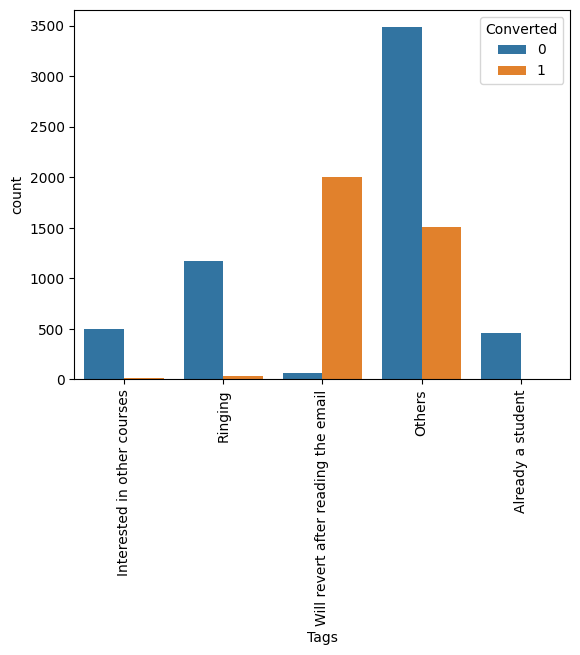

In [56]:
## Tags
sns.countplot(x = "Tags", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

Inference:

'Will Revert after reading the email' have high conversion keeping focus should be on them for more Lead_data and most of the Lead_data are from 'Others' section, foucs should be increasing conversion from them

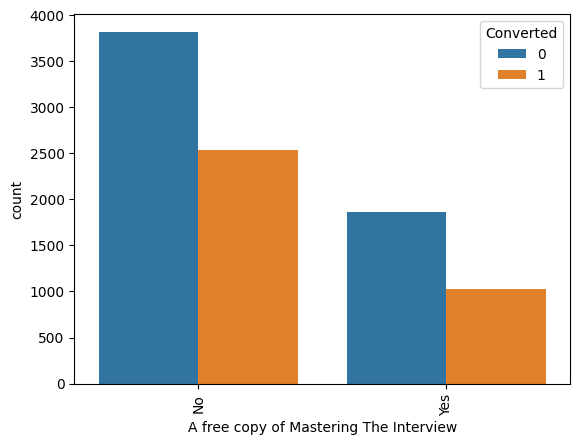

In [57]:
## A free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

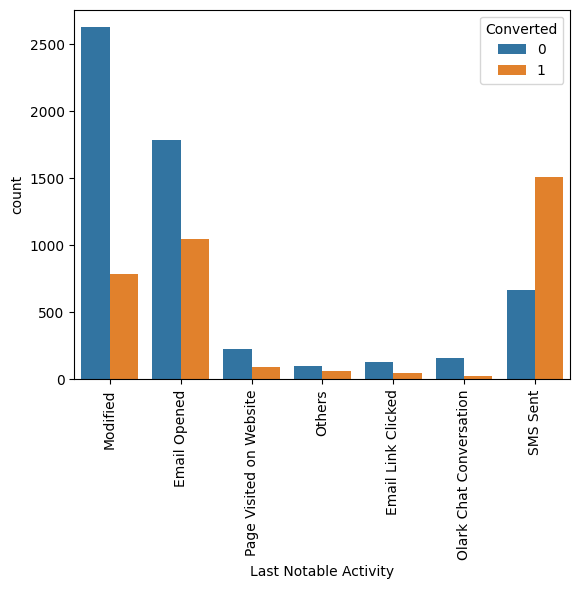

In [58]:
## Last Notable Activity
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = Lead_data_excl)
plt.xticks(rotation = 90)
plt.show()

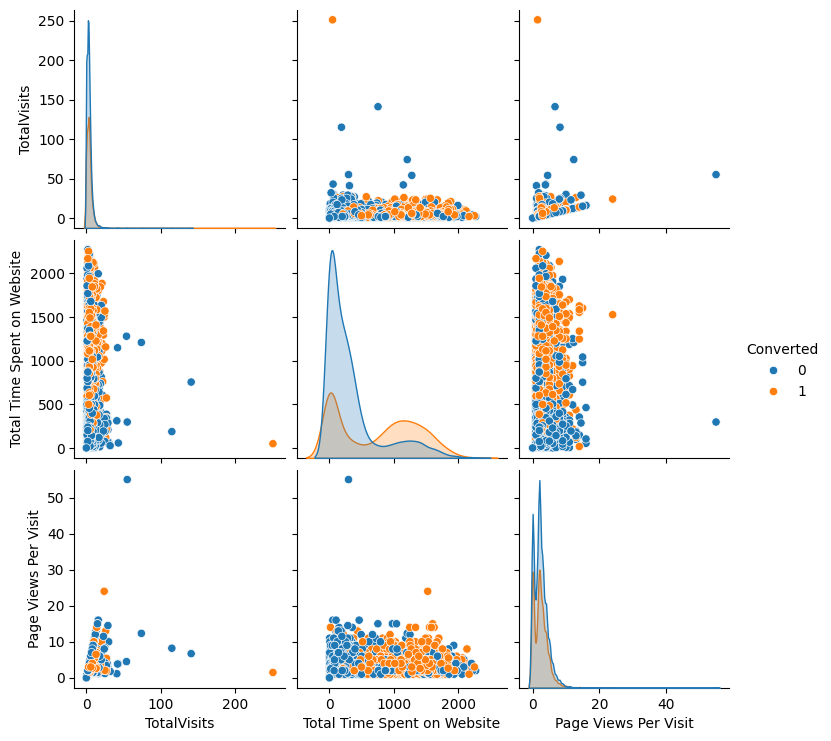

In [70]:
sns.pairplot(Lead_data_excl, diag_kind='kde', hue='Converted')
plt.show()

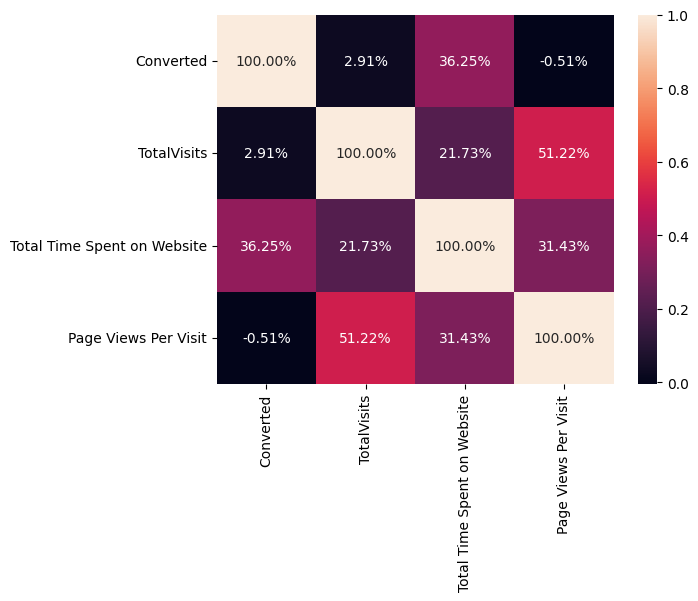

In [69]:
## Numerical columns (TotalVisits, Total Time Spent on Website, Page Views Per Visit, Converted)
sns.heatmap(Lead_data_excl.corr(numeric_only=True),annot=True, fmt=".2%")
plt.show()



Inference from above heat map

Strong correlation between Total Visits and Page Views Per Visits
Converted has good correlation with Total time spent on Website

Inference:

More Lead_data are from those who have modified their account or opened email. focus should be on their conversion.SMS sent have high converison

Outlier treatment for Numerical columns TotalVisits,Total Time Spent on Website and Page Views Per Visit

In [71]:
Num_cols = Lead_data_excl[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

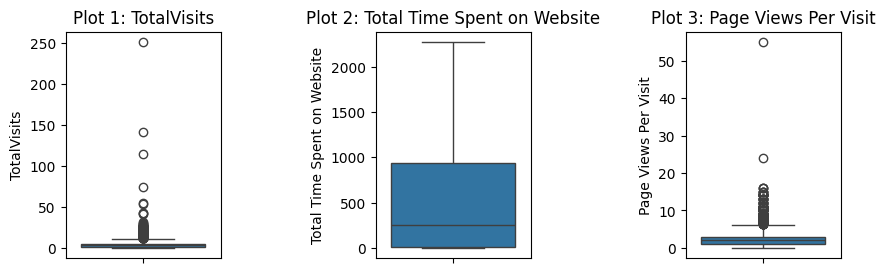

In [72]:
# Checking outliers in all the numerical columns
plt.figure(figsize=(10,10))

for i in enumerate(Num_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(Lead_data_excl[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=1,hspace=0.2)
    
plt.show()

In [73]:
Q1=Num_cols.quantile(.25)
Q3=Num_cols.quantile(.75)
IQR=Q3-Q1
print(IQR*1.5)

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64


Imputing the outliers in TotalVisits and Page Views Per Visit with 1.5*IQR

In [74]:
Lead_data_excl.loc[Lead_data_excl['TotalVisits'] > 11, 'TotalVisits'] = 6
Lead_data_excl.loc[Lead_data_excl['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

In [75]:
Lead_data_excl.shape

(9240, 13)

In [76]:
Lead_data_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [77]:
Lead_data_excl.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Others,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Others,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


Dummy creation

In [78]:
Lead_data_excl['A free copy of Mastering The Interview'] = Lead_data_excl['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
Lead_data_excl['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
0    6352
1    2888
Name: count, dtype: int64

In [79]:
Lead_data_excl = pd.get_dummies(Lead_data_excl, drop_first=True)
Lead_data_excl.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False
1,0,5.0,674,2.5,0,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,False
2,1,2.0,1532,2.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,0,1.0,305,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False
4,1,2.0,1428,1.0,0,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False


In [80]:
Lead_data_excl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   A free copy of Mastering The Interview                9240 non-null   int64  
 5   Lead Origin_Landing Page Submission                   9240 non-null   bool   
 6   Lead Origin_Lead Add Form                             9240 non-null   bool   
 7   Lead Origin_Lead Import                               9240 non-null   bool   
 8   Lead Origin_Quick Add Form                            9240

Train-Test Split

In [81]:
X=Lead_data_excl.drop('Converted',axis=1)
y=Lead_data_excl.Converted

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Scaling

In [82]:
to_scale=['TotalVisits','Total Time Spent on Website']
scaler = StandardScaler()
X_train[to_scale]=scaler.fit_transform(X_train[to_scale])

Model Building
Feature Selection using RFE

In [83]:
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select =20).fit(X_train,y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('A free copy of Mastering The Interview', False, 29),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', False, 25),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 8),
 ('Last Activity_Olark Chat Conversation', False, 5),
 ('Last Activity_Others', False, 15),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 

In [84]:
col=X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Model 1

In [85]:
X_train_1 = sm.add_constant(X_train[col])
log_m1 = sm.GLM(y_train,X_train_1.astype(float),family=sm.families.Binomial())
log_model_1 = log_m1.fit()
log_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.1
Date:                Tue, 17 Sep 2024   Deviance:                       3210.2
Time:                        16:30:30   Pearson chi2:                 1.07e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5653
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3271      0.328    -13.201      0.000      -4.970      -3.685
Total Time Spent on Website                              1.1261      0.053     21.304      0.000       1.022       1.230
Lead Origin_Lead Add Form                                1.8494      0.665      2.782      0.005       0.546       3.153
Lead Source_Olark Chat                                   1.2522      0.129      9.682      0.000       0.999       1.506
Lead Source_Reference                                    1.7331      0.709      2.446      0.014       0.344       3.122
Lead Source_Welingak Website                             3.2469      0.979      3.318      0.001       1.329       5.165
Last Activity_Email Bounced                             -1.1364      0.370     -3.075      0.002      -1.861      -0.412
Last Activity_Email Opened                               1.3055      0.188      6.945      0.000       0.937       1.674
Last Activity_SMS Sent                                   1.5500      0.140     11.104      0.000       1.276       1.824
Specialization_Hospitality Management                   -0.8308      0.416     -1.996      0.046      -1.647      -0.015
Specialization_International Business                   -0.7797      0.361     -2.162      0.031      -1.487      -0.073
Specialization_Travel and Tourism                       -0.7497      0.338     -2.216      0.027      -1.413      -0.087
What is your current occupation_Housewife               21.1672   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
What is your current occupation_Other                   -1.2574      0.103    -12.225      0.000      -1.459      -1.056
What is your current occupation_Working Professional     1.2868      0.270      4.771      0.000       0.758       1.815
Tags_Others                                              3.3186      0.304     10.928      0.000       2.723       3.914
Tags_Ringing                                            -0.6782      0.372     -1.821      0.069      -1.408       0.052
Tags_Will revert after reading the email                 6.6525      0.341     19.526      0.000       5.985       7.320
Last Notable Activity_Email Opened                      -1.1339      0.220     -5.165      0.000      -1.564      -0.704
Last Notable Activity_Modified                          -1.1111      0.136     -8.163      0.000      -1.378      -0.844
Last Notable Activity_Olark Chat Conversation           -1.0538      0.407     -2.592      0.010      -1.851      -0.257
========================================================================================================================
"""

Dropping 'What is your current occupation_Housewife' because of high p-Value and rebuilding model

In [86]:
col = col.drop('What is your current occupation_Housewife', 1)

X_train_2 = sm.add_constant(X_train[col])
log_m2 = sm.GLM(y_train,X_train_2.astype(float),family=sm.families.Binomial())
log_model_2 = log_m2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1607.3
Date:                Tue, 17 Sep 2024   Deviance:                       3214.7
Time:                        16:30:31   Pearson chi2:                 1.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3310      0.328    -13.211      0.000      -4.974      -3.689
Total Time Spent on Website                              1.1268      0.053     21.315      0.000       1.023       1.230
Lead Origin_Lead Add Form                                1.8441      0.665      2.773      0.006       0.541       3.147
Lead Source_Olark Chat                                   1.2488      0.129      9.659      0.000       0.995       1.502
Lead Source_Reference                                    1.7520      0.708      2.473      0.013       0.363       3.141
Lead Source_Welingak Website                             3.2472      0.979      3.318      0.001       1.329       5.165
Last Activity_Email Bounced                             -1.1394      0.370     -3.081      0.002      -1.864      -0.414
Last Activity_Email Opened                               1.3190      0.187      7.041      0.000       0.952       1.686
Last Activity_SMS Sent                                   1.5487      0.140     11.091      0.000       1.275       1.822
Specialization_Hospitality Management                   -0.8381      0.417     -2.011      0.044      -1.655      -0.021
Specialization_International Business                   -0.7852      0.361     -2.175      0.030      -1.493      -0.078
Specialization_Travel and Tourism                       -0.7543      0.338     -2.229      0.026      -1.418      -0.091
What is your current occupation_Other                   -1.2625      0.103    -12.282      0.000      -1.464      -1.061
What is your current occupation_Working Professional     1.2774      0.270      4.734      0.000       0.749       1.806
Tags_Others                                              3.3263      0.304     10.954      0.000       2.731       3.922
Tags_Ringing                                            -0.6761      0.373     -1.815      0.070      -1.406       0.054
Tags_Will revert after reading the email                 6.6650      0.341     19.562      0.000       5.997       7.333
Last Notable Activity_Email Opened                      -1.1439      0.219     -5.223      0.000      -1.573      -0.715
Last Notable Activity_Modified                          -1.1096      0.136     -8.150      0.000      -1.376      -0.843
Last Notable Activity_Olark Chat Conversation           -1.0532      0.407     -2.589      0.010      -1.851      -0.256
========================================================================================================================
"""

In [87]:

X_train_3 = sm.add_constant(X_train[col])
log_m3 = sm.GLM(y_train,X_train_3.astype(float),family=sm.families.Binomial())
log_model_3 = log_m3.fit()
log_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1607.3
Date:                Tue, 17 Sep 2024   Deviance:                       3214.7
Time:                        16:30:31   Pearson chi2:                 1.08e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3310      0.328    -13.211      0.000      -4.974      -3.689
Total Time Spent on Website                              1.1268      0.053     21.315      0.000       1.023       1.230
Lead Origin_Lead Add Form                                1.8441      0.665      2.773      0.006       0.541       3.147
Lead Source_Olark Chat                                   1.2488      0.129      9.659      0.000       0.995       1.502
Lead Source_Reference                                    1.7520      0.708      2.473      0.013       0.363       3.141
Lead Source_Welingak Website                             3.2472      0.979      3.318      0.001       1.329       5.165
Last Activity_Email Bounced                             -1.1394      0.370     -3.081      0.002      -1.864      -0.414
Last Activity_Email Opened                               1.3190      0.187      7.041      0.000       0.952       1.686
Last Activity_SMS Sent                                   1.5487      0.140     11.091      0.000       1.275       1.822
Specialization_Hospitality Management                   -0.8381      0.417     -2.011      0.044      -1.655      -0.021
Specialization_International Business                   -0.7852      0.361     -2.175      0.030      -1.493      -0.078
Specialization_Travel and Tourism                       -0.7543      0.338     -2.229      0.026      -1.418      -0.091
What is your current occupation_Other                   -1.2625      0.103    -12.282      0.000      -1.464      -1.061
What is your current occupation_Working Professional     1.2774      0.270      4.734      0.000       0.749       1.806
Tags_Others                                              3.3263      0.304     10.954      0.000       2.731       3.922
Tags_Ringing                                            -0.6761      0.373     -1.815      0.070      -1.406       0.054
Tags_Will revert after reading the email                 6.6650      0.341     19.562      0.000       5.997       7.333
Last Notable Activity_Email Opened                      -1.1439      0.219     -5.223      0.000      -1.573      -0.715
Last Notable Activity_Modified                          -1.1096      0.136     -8.150      0.000      -1.376      -0.843
Last Notable Activity_Olark Chat Conversation           -1.0532      0.407     -2.589      0.010      -1.851      -0.256
========================================================================================================================
"""

In [88]:
#Dropping 'Tags_Ringing' because of high p-Value and rebuilding model
col = col.drop('Tags_Ringing', 1)

X_train_4 = sm.add_constant(X_train[col])
log_m4 = sm.GLM(y_train,X_train_4.astype(float),family=sm.families.Binomial())
log_model_4 = log_m4.fit()
log_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1608.9
Date:                Tue, 17 Sep 2024   Deviance:                       3217.8
Time:                        16:30:31   Pearson chi2:                 1.05e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8001      0.228    -21.059      0.000      -5.247      -4.353
Total Time Spent on Website                              1.1255      0.053     21.302      0.000       1.022       1.229
Lead Origin_Lead Add Form                                1.8365      0.661      2.776      0.005       0.540       3.133
Lead Source_Olark Chat                                   1.2513      0.129      9.684      0.000       0.998       1.505
Lead Source_Reference                                    1.7277      0.704      2.453      0.014       0.347       3.108
Lead Source_Welingak Website                             3.2544      0.976      3.334      0.001       1.341       5.168
Last Activity_Email Bounced                             -1.1392      0.370     -3.078      0.002      -1.865      -0.414
Last Activity_Email Opened                               1.3263      0.188      7.058      0.000       0.958       1.695
Last Activity_SMS Sent                                   1.5304      0.139     10.991      0.000       1.258       1.803
Specialization_Hospitality Management                   -0.8082      0.417     -1.937      0.053      -1.626       0.010
Specialization_International Business                   -0.7790      0.361     -2.159      0.031      -1.486      -0.072
Specialization_Travel and Tourism                       -0.7495      0.338     -2.216      0.027      -1.413      -0.086
What is your current occupation_Other                   -1.2627      0.103    -12.300      0.000      -1.464      -1.062
What is your current occupation_Working Professional     1.3004      0.273      4.772      0.000       0.766       1.835
Tags_Others                                              3.7925      0.194     19.598      0.000       3.413       4.172
Tags_Will revert after reading the email                 7.1258      0.251     28.378      0.000       6.634       7.618
Last Notable Activity_Email Opened                      -1.1424      0.220     -5.204      0.000      -1.573      -0.712
Last Notable Activity_Modified                          -1.0950      0.136     -8.059      0.000      -1.361      -0.829
Last Notable Activity_Olark Chat Conversation           -1.0466      0.407     -2.571      0.010      -1.844      -0.249
========================================================================================================================
"""

In [89]:
#Dropping 'Specialization_Hospitality Management' because of high p-Value and rebuilding model
col = col.drop('Specialization_Hospitality Management', 1)

X_train_5 = sm.add_constant(X_train[col])
log_m5 = sm.GLM(y_train,X_train_5.astype(float),family=sm.families.Binomial())
log_model_5 = log_m5.fit()
log_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1610.8
Date:                Tue, 17 Sep 2024   Deviance:                       3221.7
Time:                        16:30:31   Pearson chi2:                 1.04e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5645
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8151      0.228    -21.129      0.000      -5.262      -4.368
Total Time Spent on Website                              1.1212      0.053     21.278      0.000       1.018       1.225
Lead Origin_Lead Add Form                                1.8521      0.662      2.797      0.005       0.554       3.150
Lead Source_Olark Chat                                   1.2580      0.129      9.739      0.000       1.005       1.511
Lead Source_Reference                                    1.6780      0.704      2.382      0.017       0.297       3.059
Lead Source_Welingak Website                             3.2464      0.977      3.324      0.001       1.332       5.161
Last Activity_Email Bounced                             -1.1762      0.371     -3.168      0.002      -1.904      -0.449
Last Activity_Email Opened                               1.3226      0.188      7.036      0.000       0.954       1.691
Last Activity_SMS Sent                                   1.5278      0.139     10.987      0.000       1.255       1.800
Specialization_International Business                   -0.7644      0.360     -2.122      0.034      -1.470      -0.058
Specialization_Travel and Tourism                       -0.7363      0.338     -2.178      0.029      -1.399      -0.074
What is your current occupation_Other                   -1.2645      0.103    -12.323      0.000      -1.466      -1.063
What is your current occupation_Working Professional     1.3030      0.272      4.796      0.000       0.771       1.836
Tags_Others                                              3.8013      0.194     19.633      0.000       3.422       4.181
Tags_Will revert after reading the email                 7.1262      0.251     28.408      0.000       6.635       7.618
Last Notable Activity_Email Opened                      -1.1403      0.220     -5.194      0.000      -1.571      -0.710
Last Notable Activity_Modified                          -1.0970      0.136     -8.077      0.000      -1.363      -0.831
Last Notable Activity_Olark Chat Conversation           -1.0418      0.406     -2.564      0.010      -1.838      -0.245
========================================================================================================================
"""

Checking VIF

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]
print(vif)

                                             Features    VIF
1                           Lead Origin_Lead Add Form  15.97
3                               Lead Source_Reference  12.95
14                 Last Notable Activity_Email Opened   7.36
6                          Last Activity_Email Opened   7.22
12                                        Tags_Others   3.88
4                        Lead Source_Welingak Website   3.81
10              What is your current occupation_Other   2.32
13           Tags_Will revert after reading the email   2.23
15                     Last Notable Activity_Modified   2.05
7                              Last Activity_SMS Sent   1.77
2                              Lead Source_Olark Chat   1.58
0                         Total Time Spent on Website   1.34
11  What is your current occupation_Working Profes...   1.33
5                         Last Activity_Email Bounced   1.12
16      Last Notable Activity_Olark Chat Conversation   1.10
9                   Spec

In [91]:
#Dropping 'Lead Source_Reference' because of high VIF
col = col.drop('Lead Source_Reference', 1)

X_train_6 = sm.add_constant(X_train[col])
log_m6 = sm.GLM(y_train,X_train_6.astype(float),family=sm.families.Binomial())
log_model_6 = log_m6.fit()
log_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1613.4
Date:                Tue, 17 Sep 2024   Deviance:                       3226.8
Time:                        16:30:31   Pearson chi2:                 1.00e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5642
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7920      0.227    -21.131      0.000      -5.236      -4.348
Total Time Spent on Website                              1.1192      0.053     21.260      0.000       1.016       1.222
Lead Origin_Lead Add Form                                3.3554      0.247     13.594      0.000       2.872       3.839
Lead Source_Olark Chat                                   1.2527      0.129      9.696      0.000       0.999       1.506
Lead Source_Welingak Website                             1.7471      0.760      2.299      0.021       0.258       3.236
Last Activity_Email Bounced                             -1.2723      0.374     -3.405      0.001      -2.005      -0.540
Last Activity_Email Opened                               1.3228      0.187      7.057      0.000       0.955       1.690
Last Activity_SMS Sent                                   1.5168      0.139     10.930      0.000       1.245       1.789
Specialization_International Business                   -0.7550      0.359     -2.104      0.035      -1.459      -0.052
Specialization_Travel and Tourism                       -0.7344      0.338     -2.172      0.030      -1.397      -0.072
What is your current occupation_Other                   -1.2621      0.103    -12.303      0.000      -1.463      -1.061
What is your current occupation_Working Professional     1.3368      0.271      4.940      0.000       0.806       1.867
Tags_Others                                              3.7867      0.193     19.644      0.000       3.409       4.164
Tags_Will revert after reading the email                 7.1061      0.250     28.418      0.000       6.616       7.596
Last Notable Activity_Email Opened                      -1.1479      0.219     -5.237      0.000      -1.577      -0.718
Last Notable Activity_Modified                          -1.1024      0.136     -8.115      0.000      -1.369      -0.836
Last Notable Activity_Olark Chat Conversation           -1.0439      0.405     -2.576      0.010      -1.838      -0.250
========================================================================================================================
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,7.36
5,Last Activity_Email Opened,7.22
11,Tags_Others,3.88
9,What is your current occupation_Other,2.32
12,Tags_Will revert after reading the email,2.23
14,Last Notable Activity_Modified,2.05
6,Last Activity_SMS Sent,1.77
2,Lead Source_Olark Chat,1.58
1,Lead Origin_Lead Add Form,1.57
0,Total Time Spent on Website,1.34


In [93]:
#Dropping 'Last Notable Activity_Email Opened' because of high VIF
col = col.drop('Last Notable Activity_Email Opened', 1)

X_train_7 = sm.add_constant(X_train[col])
log_m7 = sm.GLM(y_train,X_train_7.astype(float),family=sm.families.Binomial())
log_model_7 = log_m7.fit()
log_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1626.9
Date:                Tue, 17 Sep 2024   Deviance:                       3253.8
Time:                        16:30:31   Pearson chi2:                 9.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5623
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.0649      0.222    -22.778      0.000      -5.501      -4.629
Total Time Spent on Website                              1.1228      0.052     21.396      0.000       1.020       1.226
Lead Origin_Lead Add Form                                3.3921      0.247     13.710      0.000       2.907       3.877
Lead Source_Olark Chat                                   1.2598      0.129      9.783      0.000       1.007       1.512
Lead Source_Welingak Website                             1.6866      0.762      2.214      0.027       0.194       3.180
Last Activity_Email Bounced                             -1.2872      0.375     -3.437      0.001      -2.021      -0.553
Last Activity_Email Opened                               0.6045      0.132      4.596      0.000       0.347       0.862
Last Activity_SMS Sent                                   1.6973      0.135     12.593      0.000       1.433       1.962
Specialization_International Business                   -0.7328      0.357     -2.056      0.040      -1.432      -0.034
Specialization_Travel and Tourism                       -0.7385      0.336     -2.199      0.028      -1.397      -0.080
What is your current occupation_Other                   -1.3064      0.102    -12.822      0.000      -1.506      -1.107
What is your current occupation_Working Professional     1.3385      0.271      4.936      0.000       0.807       1.870
Tags_Others                                              3.7919      0.192     19.730      0.000       3.415       4.169
Tags_Will revert after reading the email                 7.0663      0.249     28.395      0.000       6.579       7.554
Last Notable Activity_Modified                          -0.6829      0.109     -6.280      0.000      -0.896      -0.470
Last Notable Activity_Olark Chat Conversation           -0.7543      0.403     -1.873      0.061      -1.544       0.035
========================================================================================================================
"""

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Others,3.80
9,What is your current occupation_Other,2.31
12,Tags_Will revert after reading the email,2.18
6,Last Activity_SMS Sent,1.76
5,Last Activity_Email Opened,1.67
13,Last Notable Activity_Modified,1.61
2,Lead Source_Olark Chat,1.58
1,Lead Origin_Lead Add Form,1.57
0,Total Time Spent on Website,1.34
10,What is your current occupation_Working Profes...,1.32


In [95]:
#Dropping 'Tags_Others' because of high VIF
col = col.drop('Tags_Others', 1)

X_train_8 = sm.add_constant(X_train[col])
log_m8 = sm.GLM(y_train,X_train_8.astype(float),family=sm.families.Binomial())
log_model_8 = log_m8.fit()
log_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1997.5
Date:                Tue, 17 Sep 2024   Deviance:                       3995.0
Time:                        16:30:31   Pearson chi2:                 9.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2908      0.126    -18.240      0.000      -2.537      -2.045
Total Time Spent on Website                              1.0428      0.045     23.152      0.000       0.955       1.131
Lead Origin_Lead Add Form                                3.4513      0.212     16.288      0.000       3.036       3.867
Lead Source_Olark Chat                                   1.3011      0.118     11.020      0.000       1.070       1.533
Lead Source_Welingak Website                             2.5958      0.749      3.467      0.001       1.128       4.063
Last Activity_Email Bounced                             -1.0612      0.360     -2.947      0.003      -1.767      -0.355
Last Activity_Email Opened                               0.5225      0.122      4.269      0.000       0.283       0.762
Last Activity_SMS Sent                                   1.5248      0.124     12.316      0.000       1.282       1.767
Specialization_International Business                   -0.5706      0.328     -1.737      0.082      -1.214       0.073
Specialization_Travel and Tourism                       -0.4739      0.323     -1.466      0.143      -1.108       0.160
What is your current occupation_Other                   -0.2740      0.093     -2.951      0.003      -0.456      -0.092
What is your current occupation_Working Professional     1.6007      0.239      6.708      0.000       1.133       2.068
Tags_Will revert after reading the email                 4.2499      0.170     24.942      0.000       3.916       4.584
Last Notable Activity_Modified                          -0.5160      0.101     -5.126      0.000      -0.713      -0.319
Last Notable Activity_Olark Chat Conversation           -0.6334      0.374     -1.694      0.090      -1.366       0.099
========================================================================================================================
"""

In [96]:
#Dropping 'Specialization_Travel and Tourism' because of high p-Value and rebuilding model
col = col.drop('Specialization_Travel and Tourism', 1)

X_train_9 = sm.add_constant(X_train[col])
log_m9 = sm.GLM(y_train,X_train_9.astype(float),family=sm.families.Binomial())
log_model_9 = log_m9.fit()
log_model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.6
Date:                Tue, 17 Sep 2024   Deviance:                       3997.2
Time:                        16:30:31   Pearson chi2:                 9.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5090
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2984      0.125    -18.321      0.000      -2.544      -2.052
Total Time Spent on Website                              1.0434      0.045     23.172      0.000       0.955       1.132
Lead Origin_Lead Add Form                                3.4633      0.212     16.353      0.000       3.048       3.878
Lead Source_Olark Chat                                   1.3112      0.118     11.118      0.000       1.080       1.542
Lead Source_Welingak Website                             2.5951      0.749      3.465      0.001       1.127       4.063
Last Activity_Email Bounced                             -1.0739      0.359     -2.993      0.003      -1.777      -0.371
Last Activity_Email Opened                               0.5233      0.122      4.277      0.000       0.283       0.763
Last Activity_SMS Sent                                   1.5222      0.124     12.305      0.000       1.280       1.765
Specialization_International Business                   -0.5597      0.328     -1.705      0.088      -1.203       0.084
What is your current occupation_Other                   -0.2760      0.093     -2.973      0.003      -0.458      -0.094
What is your current occupation_Working Professional     1.5972      0.239      6.697      0.000       1.130       2.065
Tags_Will revert after reading the email                 4.2392      0.170     24.937      0.000       3.906       4.572
Last Notable Activity_Modified                          -0.5211      0.101     -5.182      0.000      -0.718      -0.324
Last Notable Activity_Olark Chat Conversation           -0.6314      0.374     -1.690      0.091      -1.364       0.101
========================================================================================================================
"""

In [97]:
#Dropping 'Specialization_International Business' because of high p-Value and rebuilding model
col = col.drop('Specialization_International Business', 1)

X_train_10 = sm.add_constant(X_train[col])
log_m10 = sm.GLM(y_train,X_train_10.astype(float),family=sm.families.Binomial())
log_model_10 = log_m10.fit()
log_model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2000.2
Date:                Tue, 17 Sep 2024   Deviance:                       4000.3
Time:                        16:30:31   Pearson chi2:                 9.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3103      0.125    -18.440      0.000      -2.556      -2.065
Total Time Spent on Website                              1.0437      0.045     23.191      0.000       0.956       1.132
Lead Origin_Lead Add Form                                3.4678      0.212     16.387      0.000       3.053       3.883
Lead Source_Olark Chat                                   1.3223      0.118     11.223      0.000       1.091       1.553
Lead Source_Welingak Website                             2.6033      0.749      3.477      0.001       1.136       4.071
Last Activity_Email Bounced                             -1.0799      0.359     -3.008      0.003      -1.784      -0.376
Last Activity_Email Opened                               0.5219      0.122      4.266      0.000       0.282       0.762
Last Activity_SMS Sent                                   1.5212      0.124     12.302      0.000       1.279       1.764
What is your current occupation_Other                   -0.2754      0.093     -2.967      0.003      -0.457      -0.093
What is your current occupation_Working Professional     1.6024      0.238      6.727      0.000       1.136       2.069
Tags_Will revert after reading the email                 4.2342      0.170     24.925      0.000       3.901       4.567
Last Notable Activity_Modified                          -0.5193      0.101     -5.165      0.000      -0.716      -0.322
Last Notable Activity_Olark Chat Conversation           -0.6274      0.374     -1.679      0.093      -1.360       0.105
========================================================================================================================
"""

In [98]:
#P-Value is under control, lets check VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float), i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.82
7,What is your current occupation_Other,1.60
2,Lead Source_Olark Chat,1.53
1,Lead Origin_Lead Add Form,1.52
6,Last Activity_SMS Sent,1.46
10,Last Notable Activity_Modified,1.44
5,Last Activity_Email Opened,1.33
0,Total Time Spent on Website,1.31
8,What is your current occupation_Working Profes...,1.31
3,Lead Source_Welingak Website,1.26


VIF is also under control as none have more than 5 VIF value

Probability prediction

In [99]:
y_train_pred = log_model_10.predict(X_train_10.astype(float)).values.reshape(-1)
y_train_pred[:10]

array([0.19936463, 0.14399451, 0.23364659, 0.65380549, 0.12903354,
       0.99908153, 0.07241088, 0.87737334, 0.07780192, 0.995954  ])

In [100]:
y_train_pred

array([0.19936463, 0.14399451, 0.23364659, ..., 0.19936463, 0.03559945,
       0.10111559])

In [101]:
y_train

1871    0
6795    0
3516    0
8105    0
3934    0
       ..
350     1
79      1
8039    1
6936    0
5640    0
Name: Converted, Length: 6468, dtype: int64

In [102]:
y_train_pred_final = pd.DataFrame({'Converted_Ind':y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Prospect_Id'] = y_train.index
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id
0,0,0.199365,1871
1,0,0.143995,6795
2,0,0.233647,3516
3,0,0.653805,8105
4,0,0.129034,3934


In [103]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted
0,0,0.199365,1871,0
1,0,0.143995,6795,0
2,0,0.233647,3516,0
3,0,0.653805,8105,1
4,0,0.129034,3934,0


Creating Confusion Matrix

In [104]:
confusion = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted )
confusion

array([[3744,  258],
       [ 617, 1849]], dtype=int64)

In [105]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted)

0.8647186147186147

In [106]:
print(classification_report( y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted ))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4002
           1       0.88      0.75      0.81      2466

    accuracy                           0.86      6468
   macro avg       0.87      0.84      0.85      6468
weighted avg       0.87      0.86      0.86      6468



In [107]:
#Metrics beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity/recall of our logistic regression model -- True Positive Rate
TP / float(TP+FN)

0.7497972424979724

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.9355322338830585

In [110]:
# Calculate false postive rate - predicting converted when customer does have not converted -- 1-Specificity
print(FP/ float(TN+FP))

0.06446776611694154


In [111]:
# positive predictive value - Precision
print (TP / float(TP+FP))

0.8775510204081632


In [112]:
# Negative predictive value - Precision
print (TN / float(TN+ FN))

0.8585186883742261


Plotting ROC Curve

An ROC curve demonstrates several things:
It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows to the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob, drop_intermediate = False )

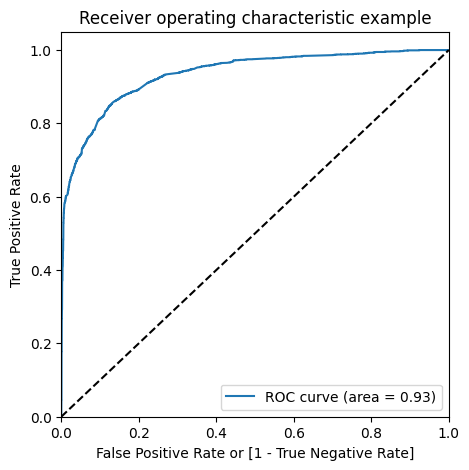

In [115]:
draw_roc(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

Finding Optimal Cut-Off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.199365,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.143995,6795,0,1,1,0,0,0,0,0,0,0,0
2,0,0.233647,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.653805,8105,1,1,1,1,1,1,1,1,0,0,0
4,0,0.129034,3934,0,1,1,0,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.717532  0.966342  0.564218
0.2   0.2  0.835034  0.892133  0.799850
0.3   0.3  0.864255  0.849148  0.873563
0.4   0.4  0.867656  0.804542  0.906547
0.5   0.5  0.864719  0.749797  0.935532
0.6   0.6  0.861472  0.706407  0.957021
0.7   0.7  0.854669  0.667478  0.970015
0.8   0.8  0.844929  0.623682  0.981259
0.9   0.9  0.833952  0.577453  0.992004


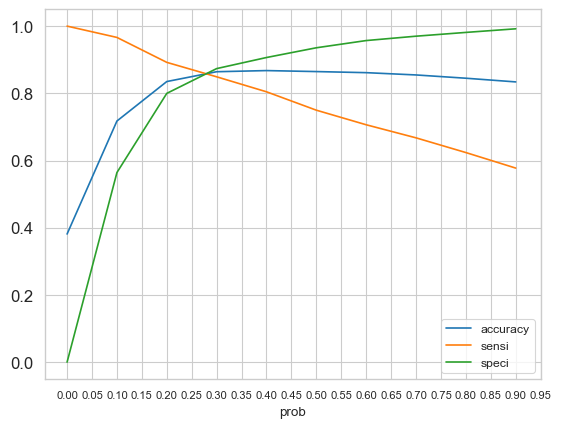

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)
y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199365,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.143995,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.233647,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.653805,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.129034,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [120]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8625541125541125

In [121]:
confusion2 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion2

array([[3460,  542],
       [ 347, 2119]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8592862935928629

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8645677161419291

In [125]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.13543228385807096


In [126]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7963171739947388


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9088521145258734


Precision and Recall

In [128]:
## Precision - TP/TP+FP
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7963171739947388

In [129]:
## Recall - TP/TP+FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8592862935928629

In [130]:
#Using Sklearn utility for Precision and recall
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.7963171739947388

In [131]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8592862935928629

Precision and Recall Tradeoff
For our Business Problem, The appropriate Metrics to be use will be Recall and Precision.

Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [132]:
y_train_pred_final.Converted_Ind, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted_Ind, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [133]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_Ind, y_train_pred_final.Converted_Prob)

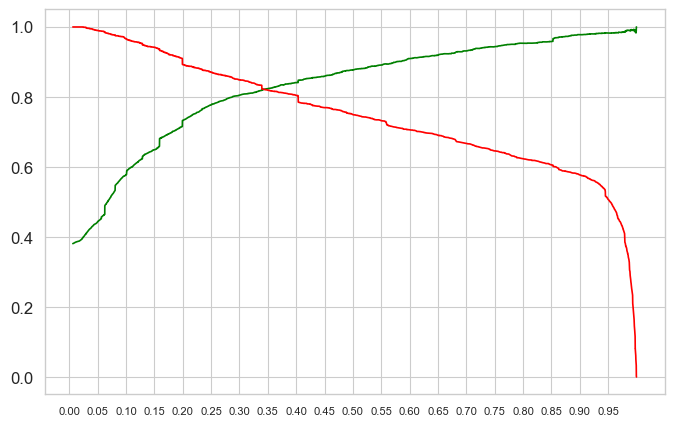

In [134]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

The precision and Recall seem to have trade-off at .33, hence .33 will be used as threshold on test data

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,Converted_Ind,Converted_Prob,Prospect_Id,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.199365,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.143995,6795,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.233647,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.653805,8105,1,1,1,1,1,1,1,1,0,0,0,1
4,0,0.129034,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [136]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8648732220160792

In [137]:
confusion3 = confusion_matrix(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted )
confusion3

array([[3533,  469],
       [ 405, 2061]], dtype=int64)

In [138]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8357664233576643

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.882808595702149

In [141]:
# Calculate false postive rate - predicting converted when customer have not
print(FP/ float(TN+FP))

0.11719140429785108


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8146245059288537


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8971559167089893


In [144]:
precision_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8146245059288537

In [145]:
recall_score(y_train_pred_final.Converted_Ind, y_train_pred_final.final_predicted)

0.8357664233576643

Making Prediction on Test data

In [146]:
## Scaling
to_scale=['TotalVisits','Total Time Spent on Website']
X_test[to_scale]=scaler.transform(X_test[to_scale])
#please check this once

In [147]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2772 entries, 4269 to 2960
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2772 non-null   float64
 1   Total Time Spent on Website                           2772 non-null   float64
 2   Lead Origin_Lead Add Form                             2772 non-null   bool   
 3   Lead Source_Olark Chat                                2772 non-null   bool   
 4   Lead Source_Welingak Website                          2772 non-null   bool   
 5   Last Activity_Email Bounced                           2772 non-null   bool   
 6   Last Activity_Email Opened                            2772 non-null   bool   
 7   Last Activity_SMS Sent                                2772 non-null   bool   
 8   What is your current occupation_Other                 2772 n

In [148]:
# Predicting the final test model 
y_test_pred = log_model_10.predict(X_test_sm.astype(float))
y_test_pred[:10]

4269    0.485556
2376    0.997500
7766    0.937897
9199    0.080809
4359    0.993237
9186    0.975631
1631    0.969417
8963    0.884266
8007    0.033179
5324    0.944094
dtype: float64

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.485556
2376,0.997500
7766,0.937897
9199,0.080809
4359,0.993237


In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [151]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [154]:
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.485556
1,1,2376,0.997500
2,1,7766,0.937897
3,0,9199,0.080809
4,1,4359,0.993237


In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [156]:
y_pred_final.head()

,Converted_IND,Prospect_IND,Converted_Prob
0,1,4269,0.485556
1,1,2376,0.997500
2,1,7766,0.937897
3,0,9199,0.080809
4,1,4359,0.993237


In [157]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Converted_IND,Prospect_IND,Converted_Prob,final_predicted
0,1,4269,0.485556,1
1,1,2376,0.997500,1
2,1,7766,0.937897,1
3,0,9199,0.080809,0
4,1,4359,0.993237,1


In [158]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8650793650793651

In [159]:
confusion_final = confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1481,  196],
       [ 178,  917]], dtype=int64)

In [160]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [161]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8374429223744292

In [162]:
# Let us calculate specificity
TN / float(TN+FP)

0.8831246273106739

In [163]:
precision_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8238993710691824

In [164]:
recall_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8374429223744292

In [165]:
fpr, tpr, thresholds = roc_curve(y_pred_final.Converted_IND, y_pred_final.Converted_Prob, drop_intermediate=False)

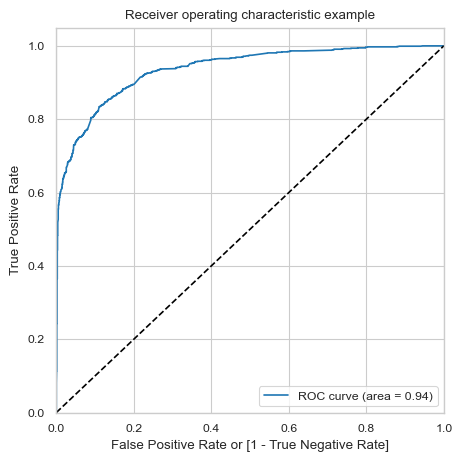

In [166]:
# Invoking the functio to draw ROC curve
draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

Lead Scoring

In [167]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Converted_IND,Prospect_IND,Converted_Prob,final_predicted,lead_score
2771,1,2960,0.997500,1,99
2284,1,1614,0.992111,1,99
638,1,5266,0.992467,1,99
1498,1,7941,0.995618,1,99
258,1,7683,0.996835,1,99
...,...,...,...,...,...
2415,0,6669,0.006286,0,0
1620,0,5897,0.007599,0,0
2034,0,2454,0.008725,0,0
597,0,3682,0.006924,0,0


Using Decision Trees

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [169]:
X_train.shape, X_test.shape

((6468, 55), (2772, 55))

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [172]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [173]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [174]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1677
           1       0.83      0.86      0.84      1095

    accuracy                           0.88      2772
   macro avg       0.87      0.87      0.87      2772
weighted avg       0.88      0.88      0.88      2772



In [176]:
from sklearn.metrics import RocCurveDisplay

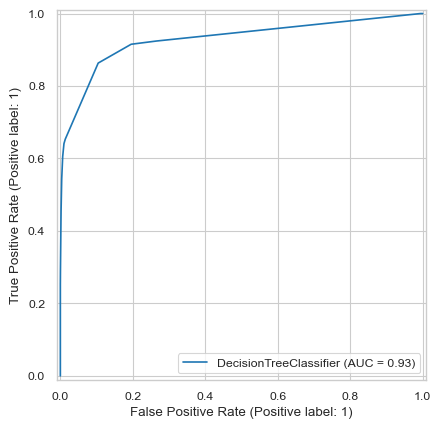

In [177]:
RocCurveDisplay.from_estimator(dt_base, X_train, y_train)
plt.show()

After running the model on the Test Data these are the figures we obtain:
 	Confusion matrix -1481(TP),  196(TN),  178(FP), 917(FN).
 	overall accuracy-86.5%
 	Sensitivity-83.7%
 	Specificity-88.3%
 	Precision-82.3%
 	Recall-83.7%
 	
